In [ ]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
def compute_iou(rec1, rec2):
    """
    computing IoU
    :param rec1: (y0, x0, y1, x1), which reflects
            (top, left, bottom, right)
    :param rec2: (y0, x0, y1, x1)
    :return: scala value of IoU
    """
    # computing area of each rectangles
    S_rec1 = (rec1[2] - rec1[0]) * (rec1[3] - rec1[1])
    S_rec2 = (rec2[2] - rec2[0]) * (rec2[3] - rec2[1])
 
    # computing the sum_area
    sum_area = S_rec1 + S_rec2
 
    # find the each edge of intersect rectangle
    left_line = max(rec1[1], rec2[1])
    right_line = min(rec1[3], rec2[3])
    top_line = max(rec1[0], rec2[0])
    bottom_line = min(rec1[2], rec2[2])
 
    # judge if there is an intersect
    if left_line >= right_line or top_line >= bottom_line:
        return 0
    else:
        intersect = (right_line - left_line) * (bottom_line - top_line)
        return (intersect / (sum_area - intersect))*1.0

def near(box1, box2):
    box1=(box1[0],box1[1],box1[0]+box1[2],box1[1]+box1[3])
    box2=(box2[0],box2[1],box2[0]+box2[2],box2[1]+box2[3])
    iou = compute_iou(box1,box2)
    #print(box1, box2,iou)
    return iou > 0.8

img = cv2.cvtColor(cv2.imread('image5.jpg'), cv2.COLOR_BGR2RGB)
mser = cv2.MSER_create(_max_area = 10000, _min_area=50)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
regions, boxes = mser.detectRegions(gray)
boxes = list(boxes)
num = 0
tmp = []
boxes.sort(key=lambda x:(x[0],x[1]))
for idx,box in enumerate(boxes):
    x, y, w, h = box
    if w >= h:
        continue
    #if h >= 2*w:
    #    continue
    if idx != 0:
        if(near(boxes[idx],boxes[idx-1])):
            continue
    num += 1
    #cv2.rectangle(img, (x,y),(x+w, y+h), (255, 0, 0), 2)
    tmp.append(box)

boxes = tmp
print(num)
plt.imshow(img)
plt.show()

In [ ]:
img = cv2.cvtColor(cv2.imread('image2.png'), cv2.COLOR_BGR2RGB)
def classify( img, th_V=240, th_Size=36 ):
    mask = maskHSV( img,th_V )
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    num = 0
    x,y = 0,0
    sum = np.array([0,0,0])
    for i in range(lab.shape[0]):
        for j in range(lab.shape[1]):
            if mask[ i,j ]:
                sum += lab[ i,j ]
                x += i
                y += j
                num += 1
    if num <= th_Size:
        return 'none', -1, -1
    sum = sum / num
    x = int(x/num)
    y = int(y/num)
    blue = np.linalg.norm(sum-np.array([188, 146,  87]))
    red = np.linalg.norm(sum-np.array([200, 158, 140]))
    white = np.linalg.norm(sum-np.array([255, 128, 128]))
    #print('blue red white\n',blue,red,white)
    #print(num)
    if white <= 15:
        return 'none',x,y
    elif red < blue:
        return 'red',x,y
    else:
        return 'blue',x,y

def display( imgs ):
    n = len(imgs)
    length = int(np.sqrt(n))
    length = length+1
    for idx,img in enumerate(imgs):
        ax = plt.subplot(length,length,idx+1)
        color, x, y = classify(img)
        #print(color)
        cv2.circle(img,(y,x),1,(123,52,0))
        plt.imshow(img)
        ax.set_title(color)
        plt.axis('off')
    return
    

imgs=[]
for box in boxes:
    x, y, w, h = box
    x1 = x
    y1 = y
    x2 = x1+w
    y2 = y1+h
    img2 = np.copy(img[y1:y2,x1:x2,:])
    imgs.append(img2)

display(imgs)
#23
#img_test = imgs[23]
#plt.imshow(img_test)
#classify(img_test)
#plt.imshow(maskHSV(img_test,240))

In [ ]:
def classify( img ):
    mask = maskHSV( img )
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    num = 0
    x,y = 0,0
    sum = np.array([0,0,0])
    for i in range(lab.shape[0]):
        for j in range(lab.shape[1]):
            if mask[ i,j ]:
                sum += lab[ i,j ]
                x += i
                y += j
                num += 1
    if num == 0:
        return 'none', -1, -1
    sum = sum / num
    x = int(x/num)
    y = int(y/num)
    blue = np.linalg.norm(sum-np.array([188, 146,  87]))
    red = np.linalg.norm(sum-np.array([200, 158, 140]))
    white = np.linalg.norm(sum-np.array([255, 128, 128]))
    if white <= 5:
        return 'none',x,y
    elif red < blue:
        return 'red',x,y
    else:
        return 'blue',x,y

show_img = np.copy(img)
for box in boxes:
    x, y, w, h = box
    x1 = x
    y1 = y
    x2 = x1+w
    y2 = y1+h
    img2 = img[y1:y2,x1:x2,:]
    color, y, x = classify(img2)
    if color == 'red':
        cv2.circle(show_img,(x1+x,y1+y),5,(0,0,0),thickness=-1)
    if color == 'blue':
        cv2.circle(show_img,(x1+x,y1+y),5,(255,255,255),thickness=-1)
plt.imshow(show_img)

In [ ]:
#28 7
x, y, w, h = boxes[20]
x1 = x
y1 = y
x2 = x1+w
y2 = y1+h
#np.save('12',img[y1:y2,x1:x2,:])
plt.imshow(img[y1:y2,x1:x2,:])

In [ ]:
hsv = cv2.cvtColor(img[y1:y2,x1:x2,:],cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, (0, 0, 254), (255, 255, 255))

In [ ]:
plt.imshow(mask)

## 以上部分为数据采集，下面为特征探索。

加载数据

In [ ]:
boxes = []
for i in range(1,13):
    box = np.load(str(i)+'.npy')
    boxes.append(box)

In [ ]:
len(boxes)

In [ ]:
for idx,box in enumerate(boxes):
    plt.subplot(1,12,idx+1)
    plt.imshow(box)
    plt.axis('off')

先mask出高光区域

In [ ]:
def maskHSV( img,th_V = 240 ):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, (0, 0, th_V), (255, 255, 255))
    return mask

In [ ]:
for idx,box in enumerate(boxes):
    plt.subplot(1,12,idx+1)
    plt.imshow(maskHSV(box))
    plt.axis('off')

然后就是找了

In [ ]:
'''
# Method 1 
from colormath.color_objects import LabColor, sRGBColor
from colormath.color_conversions import convert_color
colors_lab = {#'red': (5569.417504595725, 6460.793430576633, 5421.048850085641), #red
              #'blue': (3880.248233844353, 6388.267687373855, -8701.367717798912), #blue
              #'cyan': (8624.745133456714, -3878.809655324538, -1140.5453567984496), #cyan
              'white': (9341.568974319263, -0.037058350415009045, -0.6906417562959177),
              'lightblue': (7090.118334344169, 1579.2390897392643, -3456.9248198489945),  #lightblue
              'lightred': (7523.431005395625, 2567.8164640639666, 1062.1496632379462), #lightred
             }

def getColorName( rgb ):
    rgb = sRGBColor(*rgb)
    lab = convert_color(rgb, LabColor)
    lab = (lab.lab_l, lab.lab_a, lab.lab_b)
    (name, values) = min(colors_lab.items(),
            key=lambda x:( (x[1][0]-lab[0])**2 + (x[1][1]-lab[1])**2 + (x[1][2]-lab[2])**2)**0.5 )
    return name

def classify( img ):
    x, y, num = 0, 0, 0
    res = {}
    mask = maskHSV( img )
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if mask[ i,j ]:
                color = getColorName( img[ i,j ] )
                if color in ['red','lightred']:
                    return 'red', i, j
                if color in ['blue','cyan','lightblue']:
                    return 'blue', i, j
    return 'none', -1, -1
'''

# Method 2
def classify( img ):
    mask = maskHSV( img )
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    num = 0
    x,y = 0,0
    sum = np.array([0,0,0])
    for i in range(lab.shape[0]):
        for j in range(lab.shape[1]):
            if mask[ i,j ]:
                sum += lab[ i,j ]
                x += i
                y += j
                num += 1
    if num == 0:
        return 'none', -1, -1
    sum = sum / num
    x = int(x/num)
    y = int(y/num)
    blue = np.linalg.norm(sum-np.array([188, 146,  87]))
    red = np.linalg.norm(sum-np.array([200, 158, 140]))
    white = np.linalg.norm(sum-np.array([255, 128, 128]))
    if white <= 5:
        return 'none',x,y
    elif red < blue:
        return 'red',x,y
    else:
        return 'blue',x,y


In [ ]:
boxes = []
for i in range(1,13):
    box = np.load(str(i)+'.npy')
    boxes.append(box)
    
for idx,box in enumerate(boxes):
    ax = plt.subplot(1,12,idx+1)
    color, x, y = classify(box)
    cv2.circle(box,(y,x),1,(123,52,0))
    plt.imshow(box)
    ax.set_title(color)
    plt.axis('off')

以下部分为探索

In [ ]:
def test():
    for box in boxes:
        color, x, y = classify(box)
%timeit test

In [ ]:
colors = {
        'red': (255, 0, 0),
        'green': (0, 255, 0),
        'blue': (0, 0, 255),
        'yellow': (255, 255, 0),
        'cyan': (0, 255, 255),
        'violet': (255, 0, 255),
        'orange': (255, 170, 0),
        'black': (0, 0, 0),
        'white': (255, 255, 255),
        'brown': (123, 52, 0),
        'gray': (127, 127, 127),
        'lightblue': (173, 173, 255),
        'lightred': (255, 173, 173),
        'lightgreen': (173, 255, 173),
        }
x = np.array([[[173, 173, 255] , [255, 173, 173] , [255, 255, 255],[127, 127, 127],(0, 0, 0),[255, 255, 255]]],dtype=np.uint8)
#plt.imshow(x)
cv2.cvtColor(x, cv2.COLOR_RGB2Lab)
#lightblue lightred white gray black white

In [ ]:
img = boxes[0]
mask = maskHSV( img )
#img = np.stack((mask, mask,mask),axis=2) & img
lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
plt.imshow(img)

num = 0
sum = np.array([0,0,0])
for i in range(lab.shape[0]):
    for j in range(lab.shape[1]):
        if mask[ i,j ]:
            sum += lab[ i,j ]
            num += 1
sum = sum / num
print('lightblue', np.linalg.norm(sum-np.array([188, 146,  87])))
print('lightred', np.linalg.norm(sum-np.array([200, 158, 140])))
print('gray',np.linalg.norm(sum-np.array([136, 128, 128])))
print('white',np.linalg.norm(sum-np.array([255, 128, 128])))
#print('black',np.linalg.norm(sum-np.array([0, 128, 128])))
# 5

# 完整演示

Total boxes number:
6
Red light is marked by black dot.
Blue light is marked by white dot.


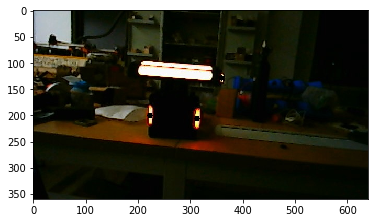

In [4]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
def compute_iou(rec1, rec2):
    """
    computing IoU
    :param rec1: (y0, x0, y1, x1), which reflects
            (top, left, bottom, right)
    :param rec2: (y0, x0, y1, x1)
    :return: scala value of IoU
    """
    # computing area of each rectangles
    S_rec1 = (rec1[2] - rec1[0]) * (rec1[3] - rec1[1])
    S_rec2 = (rec2[2] - rec2[0]) * (rec2[3] - rec2[1])
 
    # computing the sum_area
    sum_area = S_rec1 + S_rec2
 
    # find the each edge of intersect rectangle
    left_line = max(rec1[1], rec2[1])
    right_line = min(rec1[3], rec2[3])
    top_line = max(rec1[0], rec2[0])
    bottom_line = min(rec1[2], rec2[2])
 
    # judge if there is an intersect
    if left_line >= right_line or top_line >= bottom_line:
        return 0
    else:
        intersect = (right_line - left_line) * (bottom_line - top_line)
        return (intersect / (sum_area - intersect))*1.0

def near(box1, box2):
    box1=(box1[0],box1[1],box1[0]+box1[2],box1[1]+box1[3])
    box2=(box2[0],box2[1],box2[0]+box2[2],box2[1]+box2[3])
    iou = compute_iou(box1,box2)
    #print(box1, box2,iou)
    return iou > 0.8

def maskHSV( img,TH_V ):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, (0, 0, TH_V), (255, 255, 255))
    return mask

def classify( img, TH_V=240, TH_SIZE=36, TH_WHITE=15 ):
    mask = maskHSV( img,TH_V )
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    num = 0
    x,y = 0,0
    sum = np.array([0,0,0])
    for i in range(lab.shape[0]):
        for j in range(lab.shape[1]):
            if mask[ i,j ]:
                sum += lab[ i,j ]
                x += i
                y += j
                num += 1
    if num <= TH_SIZE:
        return 'none', -1, -1
    sum = sum / num
    x = int(x/num)
    y = int(y/num)
    blue = np.linalg.norm(sum-np.array([188, 146,  87]))
    red = np.linalg.norm(sum-np.array([200, 158, 140]))
    white = np.linalg.norm(sum-np.array([255, 128, 128]))
    #print('blue red white\n',blue,red,white)
    #print(num)
    if white <= TH_WHITE:
        return 'none',x,y
    elif red < blue:
        return 'red',x,y
    else:
        return 'blue',x,y


img = cv2.cvtColor(cv2.imread('image1.jpg'), cv2.COLOR_BGR2RGB)
mser = cv2.MSER_create(_max_area = 1000, _min_area=50)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
regions, boxes = mser.detectRegions(gray)
boxes = list(boxes)
num = 0
tmp = []
boxes.sort(key=lambda x:(x[0],x[1]))
for idx,box in enumerate(boxes):
    x, y, w, h = box
    if w >= h:
        continue
    #if h >= 2*w:
    #    continue
    if idx != 0:
        if(near(boxes[idx],boxes[idx-1])):
            continue
    num += 1
    #cv2.rectangle(img, (x,y),(x+w, y+h), (255, 0, 0), 2)
    tmp.append(box)

boxes = tmp
print("Total boxes number:")
print(len(boxes))



show_img = np.copy(img)
for box in boxes:
    x, y, w, h = box
    x1 = x
    y1 = y
    x2 = x1+w
    y2 = y1+h
    img2 = np.copy(img[y1:y2,x1:x2,:])
    color, y, x = classify(img2)
    if color == 'red':
        cv2.circle(show_img,(x1+x,y1+y),5,(0,0,0),thickness=-1)
    if color == 'blue':
        cv2.circle(show_img,(x1+x,y1+y),5,(0,0,255),thickness=-1)
plt.imshow(show_img)
print("Red light is marked by black dot.\nBlue light is marked by white dot.")

# TODO
 - ~~要现场测试效果和速度~~已进行过现场测试，效果和速度都不错。但测试只使用了红色灯条，还有蓝色灯条待测试效果。
 - MSER返回的regions是有用的，可以尝试最小包围矩形提取灯条。可以更准确些。
 - 最好用实际的摄像头做一个聚类，找到最佳的red blue white的lab颜色值。
 - 如果预选框中包含两个及以上数量的灯条，怎么办？